In [25]:
!pip install geopandas
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
!rm -rf geolocalizacao/

In [27]:
!git clone https://github.com/michaeldouglas/mba_IA_ML-proj_int-grupo_b

Cloning into 'mba_IA_ML-proj_int-grupo_b'...
remote: Enumerating objects: 857, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 857 (delta 115), reused 152 (delta 49), pack-reused 622
Receiving objects: 100% (857/857), 83.72 MiB | 17.06 MiB/s, done.
Resolving deltas: 100% (334/334), done.
Updating files: 100% (236/236), done.


In [28]:
%cd mba_IA_ML-proj_int-grupo_b/Python/geolocalizacao/

/content/mba_IA_ML-proj_int-grupo_b/Python/geolocalizacao/mba_IA_ML-proj_int-grupo_b/Python/geolocalizacao


In [29]:
import pandas as pd
import geopandas as gpd
from mapclassify import classify

# **Dataframe de clientes com informações de latitude e longitude**

In [30]:
clientes = pd.read_csv('./data/clientes.csv', sep=',')
clientes.head()

,ID,latitude,longitude
0,0,-22.692173,-45.559767
1,1,-23.434914,-46.638857
2,2,-23.593379,-46.444647
3,3,-22.479553,-45.678543
4,4,-23.811076,-46.645090


In [31]:
clientes.shape

(10000, 3)

# **Dataframe de caixas com informações de latitude e longitude**

In [32]:
caixas = pd.read_csv('data/caixas.csv', sep=',')
caixas.head()

,ID,latitude,longitude
0,0,-22.481797,-45.598899
1,1,-22.561752,-45.653728
2,2,-23.199113,-47.064822
3,3,-23.703180,-46.827509
4,4,-22.518834,-45.648207


In [33]:
caixas.shape

(1500, 3)

# Criando a coluna com informações geométricas de longitude e latitude nos dois Dataframes

In [34]:
caixas = gpd.GeoDataFrame(caixas, geometry=gpd.points_from_xy(caixas.longitude, caixas.latitude))
clientes = gpd.GeoDataFrame(clientes, geometry=gpd.points_from_xy(clientes.longitude, clientes.latitude))

In [35]:
clientes

,ID,latitude,longitude,geometry
0,0,-22.692173,-45.559767,POINT (-45.55977 -22.69217)
1,1,-23.434914,-46.638857,POINT (-46.63886 -23.43491)
2,2,-23.593379,-46.444647,POINT (-46.44465 -23.59338)
3,3,-22.479553,-45.678543,POINT (-45.67854 -22.47955)
4,4,-23.811076,-46.645090,POINT (-46.64509 -23.81108)
...,...,...,...,...
9995,9995,-23.496240,-46.547592,POINT (-46.54759 -23.49624)
9996,9996,-22.237507,-45.789481,POINT (-45.78948 -22.23751)
9997,9997,-23.034401,-47.110976,POINT (-47.11098 -23.03440)
9998,9998,-22.476027,-45.753572,POINT (-45.75357 -22.47603)


In [36]:
caixas

,ID,latitude,longitude,geometry
0,0,-22.481797,-45.598899,POINT (-45.59890 -22.48180)
1,1,-22.561752,-45.653728,POINT (-45.65373 -22.56175)
2,2,-23.199113,-47.064822,POINT (-47.06482 -23.19911)
3,3,-23.703180,-46.827509,POINT (-46.82751 -23.70318)
4,4,-22.518834,-45.648207,POINT (-45.64821 -22.51883)
...,...,...,...,...
1495,1495,-23.522609,-46.584087,POINT (-46.58409 -23.52261)
1496,1496,-23.637196,-46.784783,POINT (-46.78478 -23.63720)
1497,1497,-22.550498,-45.720254,POINT (-45.72025 -22.55050)
1498,1498,-22.636253,-45.704382,POINT (-45.70438 -22.63625)


# Obter a menor distancia de cada cliente até um caixa eletrônico

In [37]:
for index_caixa, caixa in caixas.iterrows():
    clientes['distancia_minima_caixa'] = clientes['geometry'].distance(caixa.geometry)
    cliente_proximo = clientes.loc[clientes['distancia_minima_caixa'].idxmin()]
    clientes.loc[cliente_proximo.name, 'distancia_minima_caixa'] = cliente_proximo['distancia_minima_caixa']


In [38]:
clientes

,ID,latitude,longitude,geometry,distancia_minima_caixa
0,0,-22.692173,-45.559767,POINT (-45.55977 -22.69217),0.163700
1,1,-23.434914,-46.638857,POINT (-46.63886 -23.43491),1.199676
2,2,-23.593379,-46.444647,POINT (-46.44465 -23.59338),1.179069
3,3,-22.479553,-45.678543,POINT (-45.67854 -22.47955),0.187922
4,4,-23.811076,-46.645090,POINT (-46.64509 -23.81108),1.474173
...,...,...,...,...,...
9995,9995,-23.496240,-46.547592,POINT (-46.54759 -23.49624),1.174077
9996,9996,-22.237507,-45.789481,POINT (-45.78948 -22.23751),0.430672
9997,9997,-23.034401,-47.110976,POINT (-47.11098 -23.03440),1.439034
9998,9998,-22.476027,-45.753572,POINT (-45.75357 -22.47603),0.189496


# Verificar qual cliente está mais próximo de um caixa eletrônico

In [39]:
proximo = clientes.loc[clientes['distancia_minima_caixa'].idxmin()]
f"O cliente que está mais próximo de um caixa eletrônico tem id {proximo.ID}, distância: {round(proximo.distancia_minima_caixa,5)} km"

'O cliente que está mais próximo de um caixa eletrônico tem id 5725, distância: 0.00154 km'

O cliente #5725 está a aproximadamente um metro do caixa eletrônico

# Verificar qual cliente está mais distante de um caixa eletrônico

In [40]:
distante = clientes.loc[clientes['distancia_minima_caixa'].idxmax()]
f"O cliente que está mais distante de um caixa eletrônico tem Id: {distante.ID}, sua distância: {round(distante.distancia_minima_caixa,5)} km"

'O cliente que está mais distante de um caixa eletrônico tem Id: 4400, sua distância: 1.7651 km'

O cliente #4400 está a aproximadamente 1,76 km de distância de um caixa eletrônico

# Distância média dos clientes até um caixa eletrônico

In [41]:
media = clientes['distancia_minima_caixa'].mean()
f"Em média os clientes estão a {round(media, 5)} km de distância dos caixas eletrônicos"

'Em média os clientes estão a 0.92884 km de distância dos caixas eletrônicos'

A distância média entre os clientes e os caixas eletrônicos é de aproximadamente 930 metros.

<Axes: >

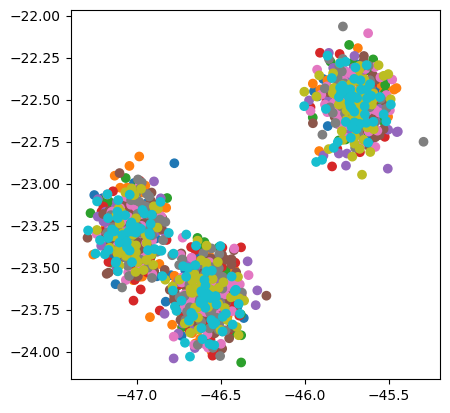

In [42]:
caixas.plot("geometry", legend=False)


<Axes: >

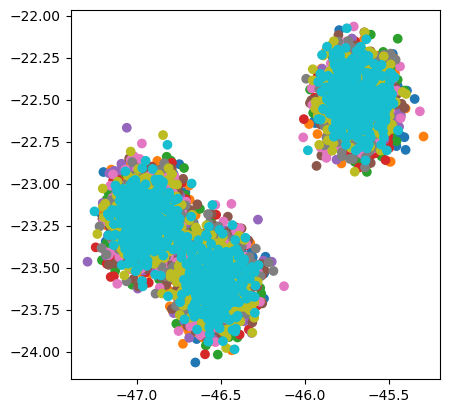

In [43]:
clientes.plot("geometry", legend=False)

<Axes: >

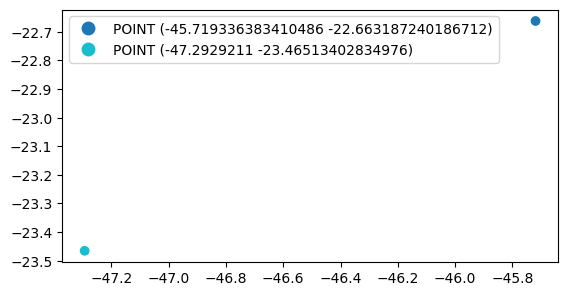

In [44]:
next_cli = clientes.iloc[[5725, 4400]]
next_cli.plot("geometry", legend=True)

In [45]:
caixas.explore("geometry", legend=False)